In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Download historical stock price data
stock_symbol = "INCY"  # Change to your preferred stock symbol
df = yf.download(stock_symbol, start="2020-01-01", end="2024-03-17")

# Display first few rows``
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker           INCY       INCY       INCY       INCY     INCY
Date                                                           
2020-01-02  85.970001  87.970001  85.360001  86.910004  1679600
2020-01-03  77.900002  78.099998  75.160004  76.150002  5529300
2020-01-06  77.339996  77.430000  75.519997  77.269997  2817200
2020-01-07  77.139999  77.620003  76.160004  77.279999  1536000
2020-01-08  76.529999  77.449997  76.080002  77.290001  1698500


In [4]:
# Use only 'Close' prices for prediction
df['Prediction'] = df['Close'].shift(-30)  # Predict 30 days into the future

# Drop last 30 rows (as they won't have target values)
df.dropna(inplace=True)

# Features (X) and Target (y)
X = df[['Close']].values  # Using only Close price as feature
y = df['Prediction'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (important for ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


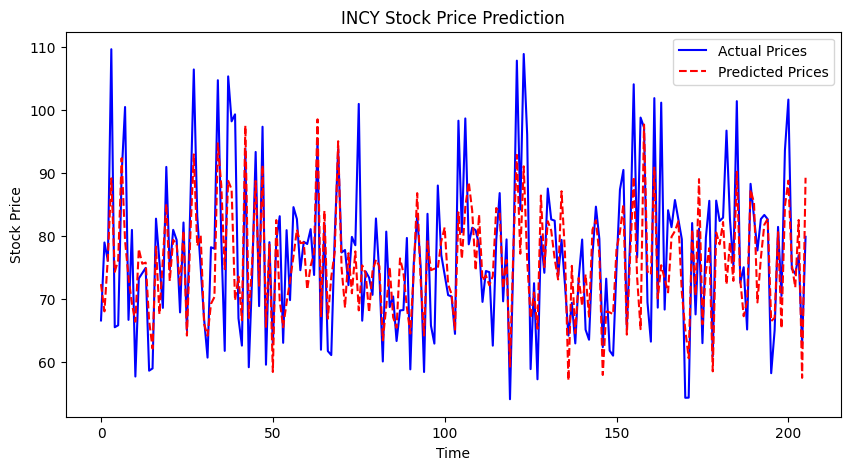

In [5]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.legend()
plt.show()
